# **Algoritma K-Means Clustering**

## **Pengertian K-Means Clustering**

K-Means Clustering adalah algoritma dalam unsupervised learning yang digunakan untuk mengelompokkan data ke dalam beberapa klaster (kelompok) berdasarkan kemiripan fitur. Setiap klaster memiliki satu centroid (titik pusat), dan data akan dimasukkan ke klaster yang memiliki centroid paling dekat dengannya.

## **Manfaat Clustering**


1. Mengelompokkan Data Secara Otomatis

  K-Means membantu mengelompokkan data yang besar dan kompleks ke dalam beberapa kelompok (cluster) berdasarkan kemiripan. Ini berguna untuk menemukan pola tersembunyi tanpa label data.

2. Menyederhanakan Analisis Data

  Dengan mengelompokkan data ke dalam cluster yang serupa, analis atau pengguna bisa lebih mudah memahami struktur data dan membuat keputusan berbasis kelompok.

3. Efisien dan Cepat

  K-Means tergolong algoritma yang ringan dan cepat karena perhitungannya relatif sederhana, terutama dibandingkan metode clustering lain seperti hierarchical clustering.

4. Aplikasi Luas

  K-Means digunakan dalam berbagai bidang, antara lain:

  - Segmentasi pelanggan dalam pemasaran (misalnya, mengelompokkan konsumen berdasarkan kebiasaan belanja).

  - Pengelompokan dokumen atau teks berdasarkan kemiripan kata (dalam NLP).

  - Analisis citra, seperti segmentasi warna dalam gambar.

  - Deteksi anomali, dengan melihat data yang tidak termasuk ke dalam cluster manapun dengan baik.

5. Dapat Digunakan Sebagai Pra-Pemrosesan

  K-Means sering digunakan untuk mengurangi dimensi data atau sebagai tahap awal sebelum menggunakan algoritma lain, misalnya sebelum klasifikasi.



## **Langkah - Langkah Algoritma K-Means Clustering**

1. Tentukan jumlah cluster
𝑘
.

2. Inisialisasi
𝑘
 centroid secara acak.

3. Hitung jarak setiap data ke masing-masing centroid.

4. Kelompokkan data ke centroid terdekat.

5. Hitung ulang centroid berdasarkan rata-rata data di tiap cluster.

6. Ulangi langkah 3–5 sampai centroid tidak berubah atau konvergen.

## **Inertia (Sum Square error/SSE)**


Inertia (atau Sum of Squared Error – SSE) adalah ukuran total jarak kuadrat antara masing-masing data point ke pusat (centroid) clusternya. Ini menggambarkan tingkat penyebaran data dalam cluster: semakin kecil nilainya, semakin baik data dikumpulkan di sekeliling centroidnya.

Inertia didefinisikan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

## **Silhouette Analysis**


Silhouette Analysis adalah teknik untuk menilai kualitas hasil clustering dengan cara mengukur seberapa baik setiap titik data berada dalam cluster yang tepat dan seberapa terpisahnya cluster satu dengan lainnya. Dalam konteks clustering seperti K-Means, Silhouette Analysis memberikan wawasan tentang apakah jumlah cluster yang dipilih sudah optimal dan apakah data tersebut dikelompokkan dengan benar.


$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak dari titik $i$ ke semua titik lain dalam klaster yang sama (cohesion)
- $b(i)$: Rata-rata jarak dari titik $i$ ke semua titik dalam klaster terdekat yang bukan miliknya (separation)
- $s(i)$: Skor silhouette untuk titik $i$, dengan nilai antara -1 dan 1

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
- Jika $s(i) \approx 1$, maka titik berada jauh dari klaster lain dan cocok dengan klasternya
- Jika $s(i) \approx 0$, maka titik berada di antara dua klaster
- Jika $s(i) \approx -1$, maka titik bisa jadi salah masuk klaster

Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data


## Implementasi dengan menggunakan data Iris

In [ ]:
%pip install pymysql
%pip install psycopg2

## Library yang digunakan

In [ ]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## Ambil dan Gabungkan Data dari Database

In [ ]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-a44046a-postgresqlpendata.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_OpeN9KvVOC1fGGGCEG-",
        database="defaultdb",
        port=21346
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM bilqiz.postgres")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-c5ffcaf-mysqlpendataa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_84u5GTktRvy0MOoNzQD",
        database="bilqizah",
        port=20432
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa          14.0          2.0          51.0         35.0
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa          13.0          2.0          47.0         32.0
  4     Iris-setosa          15.0          2.0          46.0         31.0
  5     Iris-setosa          14.0          2.0          50.0         36.0
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

## Data asli sebelum di normalisasi

Dibawah ini adalah data sebelum normalisasi

In [ ]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

print (features_before_scaling.to_string(index=False));

 petal_length  petal_width  sepal_length  sepal_width
         14.0          2.0          51.0         35.0
         14.0          2.0          40.9         30.0
         13.0          2.0          47.0         32.0
         15.0          2.0          46.0         31.0
         14.0          2.0          50.0         36.0
          1.7          0.4           5.4          3.9
          1.4          0.3           4.6          3.4
          1.5          0.2           5.0          3.4
          1.4          0.2           4.4          2.9
          1.5          0.1           4.9          3.1
          1.5          0.2           5.4          3.7
          1.6          0.2           4.8          3.4
          1.4          0.1           4.8          3.0
          1.1          0.1           4.3          3.0
          1.2          0.2           5.8          4.0
          1.5          0.4           5.7          4.4
          1.3          0.4           5.4          3.9
          1.4          0.3  

## Visualisasi data

### Visualisasi data asli tanpa menggunakan PCA

DIbawah ini adalah visualisasi data Iris secara 2 Dimensi tanpa menggunakan PCA.

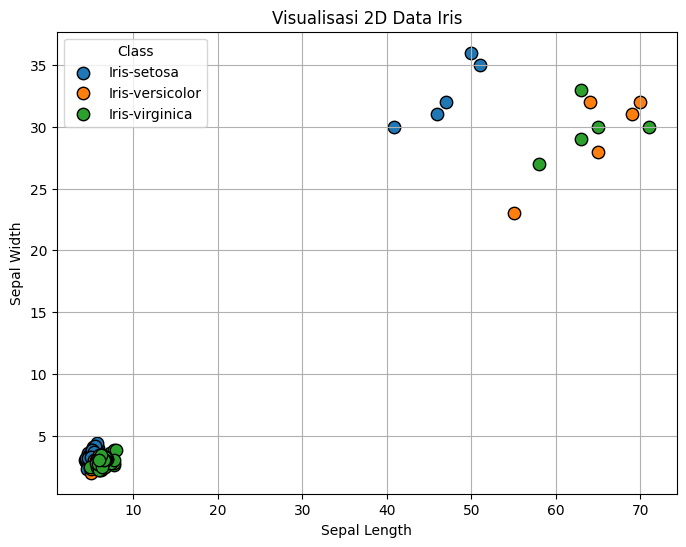

In [ ]:
# Ubah kolom 'class' menjadi kategori jika belum
df_merged['class'] = df_merged['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()


Visualisasi ini menampilkan data Iris dalam bentuk tiga dimensi tanpa penerapan teknik PCA.

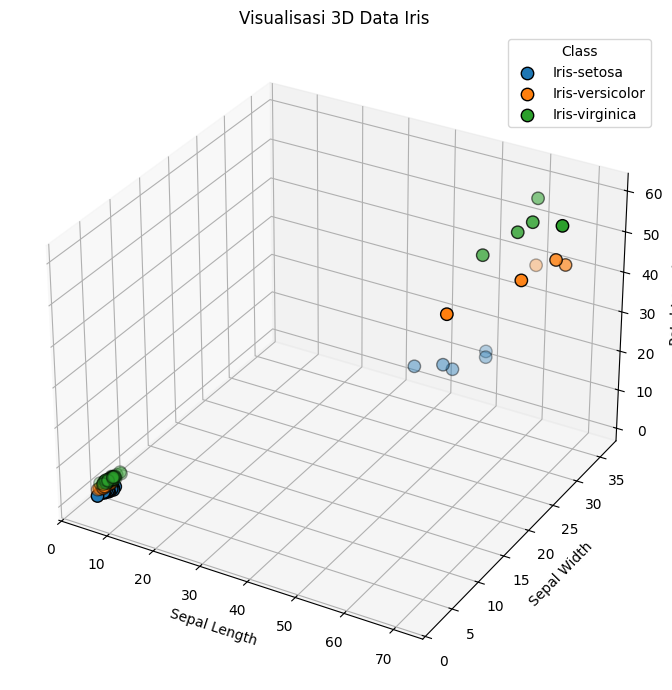

In [ ]:
df_merged['class'] = df_merged['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    ax.scatter(
        subset['sepal_length'],
        subset['sepal_width'],
        subset['petal_length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

### Visualisasi data asli menggunakan PCA

Visualisasi ini menunjukkan data Iris dalam dua dimensi yang telah direduksi menggunakan metode PCA.

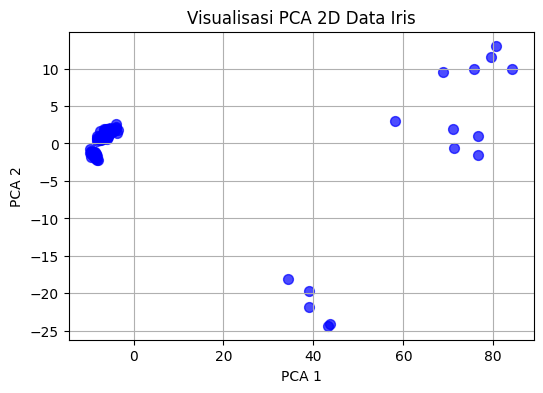

In [ ]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Visualisasi ini memperlihatkan data Iris dalam tiga dimensi setelah dilakukan reduksi dimensi menggunakan PCA.

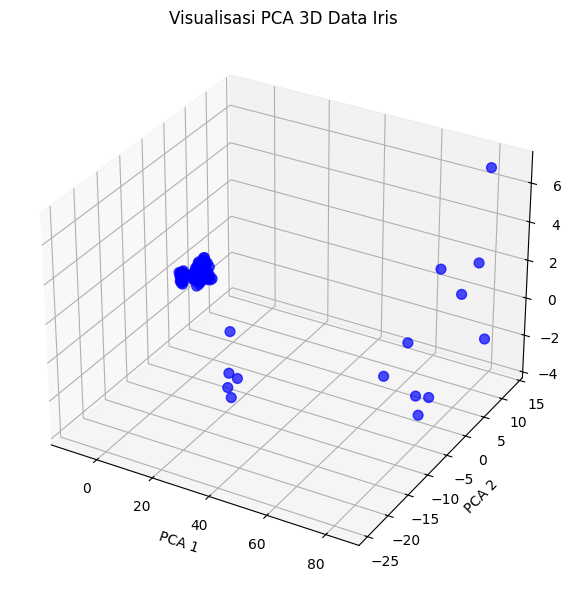

In [ ]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()


## Preprocessing dan Reduksi Dimensi

### Standarisasi dengan menggunakan MinMaxScaler

Dalam proses ini, saya melakukan normalisasi data menggunakan MinMaxScaler guna menyetarakan skala seluruh fitur dalam dataset. Langkah ini sangat penting mengingat setiap fitur memiliki rentang nilai yang bervariasi, yang dapat berdampak pada performa model machine learning, terutama pada algoritma yang mengandalkan perhitungan jarak seperti KNN dan SVM.

MinMaxScaler melakukan transformasi dengan mengubah nilai tiap fitur ke dalam rentang 0 hingga 1, berdasarkan nilai minimum dan maksimum dari fitur tersebut. Dengan skala yang konsisten, setiap fitur bisa diperlakukan secara adil oleh algoritma, tanpa bias terhadap fitur dengan nilai yang lebih besar.

Setelah penerapan normalisasi, saya mendapati model menjadi lebih stabil dan kinerjanya meningkat. Dari sini saya belajar bahwa normalisasi bukan hanya sekadar prosedur teknis, melainkan juga bagian penting dari upaya memastikan kualitas dan keandalan data dalam proses pembelajaran mesin.

In [ ]:
# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


Dibawah ini saya akan menampilkan data hasil standarisasi dengan menggunakan MinMaxScaler

In [39]:
print (scaled_features);

[[0.22033898 0.07630522 0.70014993 0.97058824]
 [0.22033898 0.07630522 0.54872564 0.82352941]
 [0.20338983 0.07630522 0.64017991 0.88235294]
 [0.23728814 0.07630522 0.62518741 0.85294118]
 [0.22033898 0.07630522 0.68515742 1.        ]
 [0.01186441 0.01204819 0.01649175 0.05588235]
 [0.00677966 0.00803213 0.00449775 0.04117647]
 [0.00847458 0.00401606 0.01049475 0.04117647]
 [0.00677966 0.00401606 0.00149925 0.02647059]
 [0.00847458 0.         0.0089955  0.03235294]
 [0.00847458 0.00401606 0.01649175 0.05      ]
 [0.01016949 0.00401606 0.00749625 0.04117647]
 [0.00677966 0.         0.00749625 0.02941176]
 [0.00169492 0.         0.         0.02941176]
 [0.00338983 0.00401606 0.02248876 0.05882353]
 [0.00847458 0.01204819 0.02098951 0.07058824]
 [0.00508475 0.01204819 0.01649175 0.05588235]
 [0.00677966 0.00803213 0.011994   0.04411765]
 [0.01186441 0.00803213 0.02098951 0.05294118]
 [0.00847458 0.00803213 0.011994   0.05294118]
 [0.01186441 0.00401606 0.01649175 0.04117647]
 [0.00847458 

## Clustering menggunakan K-Means

### Clustering dengan 2 cluster dan Visualisasi data

Pada tahap ini, saya menerapkan metode clustering menggunakan algoritma K-Means dengan jumlah 2 klaster. Selain itu, saya juga menghitung nilai Inertia dan Silhouette Score untuk mengevaluasi kualitas hasil klasterisasi. Setelah proses tersebut, saya melakukan visualisasi data Iris dalam bentuk dua dimensi untuk melihat pembagian klaster secara lebih jelas setelah proses clustering dilakukan.



[2 Clusters] Inertia: 3.6938, Silhouette Score: 0.9201


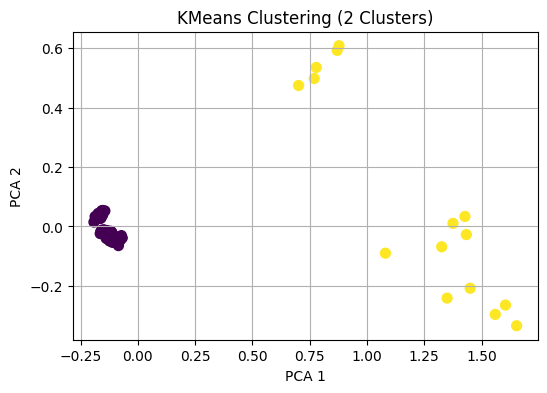

In [ ]:
# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Saya juga melakukan visualisasi data Iris dalam bentuk tiga dimensi setelah proses clustering, guna memberikan gambaran yang lebih jelas mengenai penyebaran dan pemisahan antar klaster.

[2 Clusters] Inertia: 3.6938, Silhouette Score: 0.9201


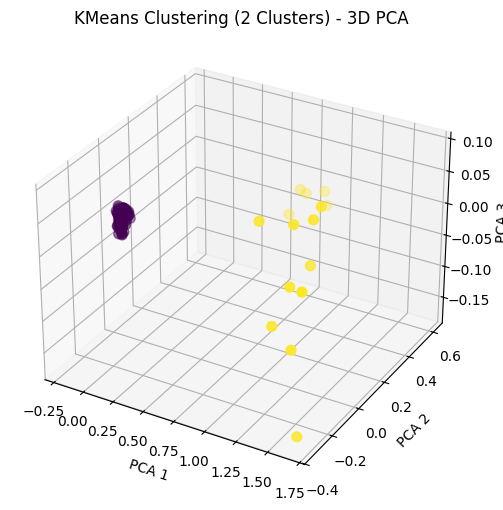

In [ ]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 3 cluster dan Visualisasi data

Pada tahap ini, saya menerapkan algoritma K-Means untuk melakukan clustering dengan jumlah 3 klaster. Saya juga menghitung nilai Inertia dan Silhouette Score sebagai evaluasi terhadap hasil klasterisasi, kemudian memvisualisasikan data Iris dalam dua dimensi untuk melihat persebaran klaster setelah proses clustering dilakukan.

[3 Clusters] Inertia: 0.7944, Silhouette Score: 0.9281


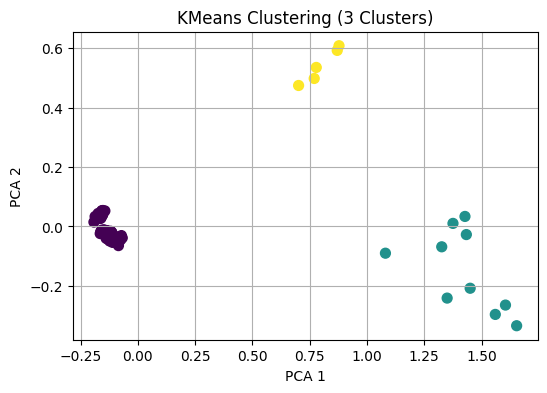

In [ ]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Saya juga membuat visualisasi tiga dimensi dari data Iris setelah proses clustering, untuk memberikan representasi yang lebih mendalam terhadap hasil pemisahan klaster.

[3 Clusters] Inertia: 0.7944, Silhouette Score: 0.9281


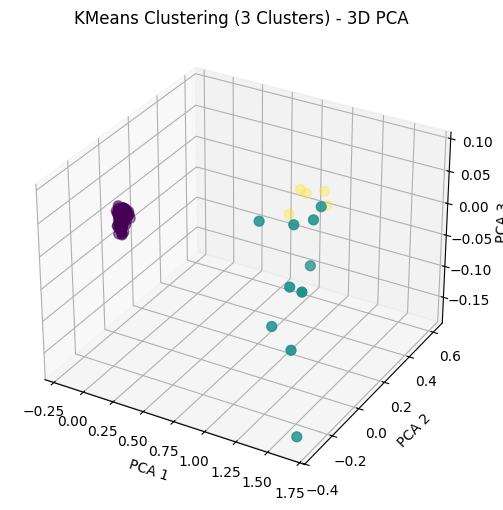

In [ ]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (3 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 4 cluster dan Visualisasi data

Pada bagian ini, saya menerapkan algoritma K-Means untuk melakukan clustering dengan jumlah 4 klaster. Selain itu, saya juga menghitung nilai Inertia dan Silhouette Score sebagai metrik evaluasi hasil klasterisasi. Setelah itu, saya melakukan visualisasi dua dimensi terhadap data Iris untuk mengamati pola pembentukan klaster secara lebih jelas.

[4 Clusters] Inertia: 0.5244, Silhouette Score: 0.9109


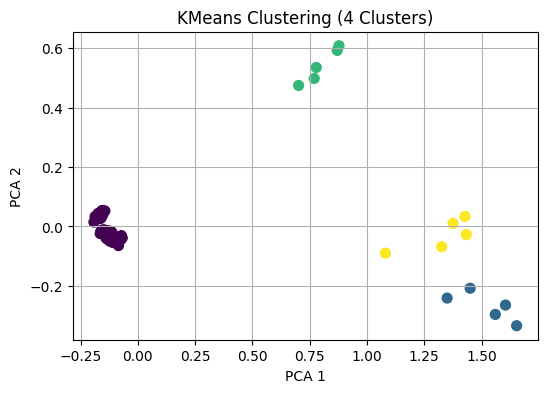

In [ ]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Disini saya juga menyajikan visualisasi dalam bentuk tiga dimensi terhadap data Iris setelah proses clustering, guna memperjelas pemisahan antar klaster secara visual.

[4 Clusters] Inertia: 0.5244, Silhouette Score: 0.9109


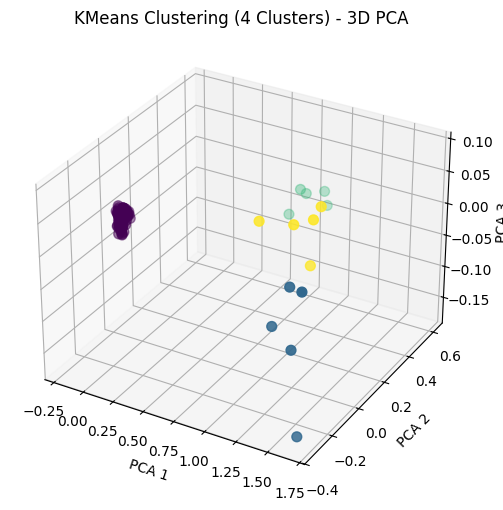

In [ ]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
